In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("C:\python\SPAM text message 20170820 - Data.csv")


In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [15]:
df=df.rename(columns={"Category": "class", "Message": "text"})

In [19]:
ham=df[df['class']=='ham']
spam=df[df['class']=='spam']

In [20]:
spam

,class,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [26]:
len(df.text[5])

147

In [27]:
df['length']=len(df.text)

In [29]:
del df['length']

In [32]:
len(df.text[2])

155

In [33]:
len(df)

5572

In [48]:
b=[]
for i in range(len(df)):
    a=len(df.text[i])
    b.append(a)


In [49]:
df['length']=pd.Series(b)

In [50]:
df

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [51]:
ham=df[df['class']=='ham']
spam=df[df['class']=='spam']

In [53]:
ham =ham.sample(spam.shape[0])

In [55]:
ndf=ham.append(spam)

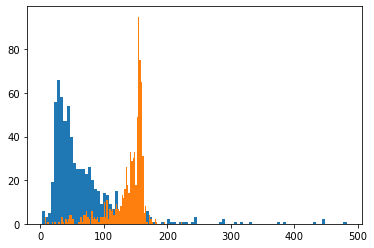

In [60]:
plt.hist(ndf[ndf['class']=='ham']['length'],bins=100)
plt.hist(ndf[ndf['class']=='spam']['length'],bins=100)
plt.show()

In [67]:
ham.length.mean(),spam.length.mean()


(74.03078982597054, 137.9892904953146)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
x_train,x_test,y_train,y_test=train_test_split(ndf['text'],ndf['class'],test_size=0.3,random_state=123,shuffle=True)

In [78]:
x_train

5383    Good day to You too.Pray for me.Remove the tee...
42      07732584351 - Rodger Burns - MSG = We tried to...
1572                    Near kalainar tv office.thenampet
2826    Congratulations - Thanks to a good friend U ha...
4528    Understand. his loss is my gain :) so do you w...
                              ...                        
2109    FREE2DAY sexy St George's Day pic of Jordan!Tx...
2730    Urgent! Please call 09066612661 from your land...
4410    For your chance to WIN a FREE Bluetooth Headse...
4903    * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4768    Your unique user ID is 1172. For removal send ...
Name: text, Length: 1045, dtype: object

In [79]:
vect=TfidfVectorizer()

In [80]:
x_train=vect.fit_transform(x_train)

In [82]:
x_train.shape

(1045, 3851)

In [92]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [93]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [94]:
y_pred=clf.predict(x_test)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       218
        spam       1.00      0.92      0.96       231

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449

